<a href="https://colab.research.google.com/github/umamahesh018/cs480student/blob/main/05/Copy_of_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

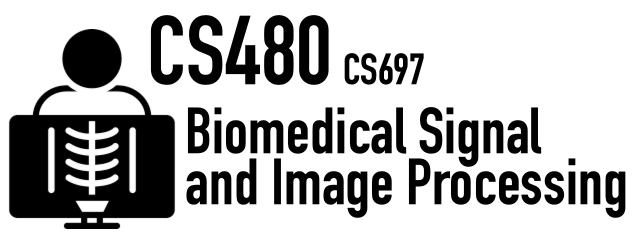
#Assignment 5

In [1]:
# In this assignment, we will visualize and explore a CT scan!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 2.0 MB 26.8 MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [4]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [6]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [7]:
# TODO: YOUR_ANSWER

There are 220 Slices

In [8]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [9]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

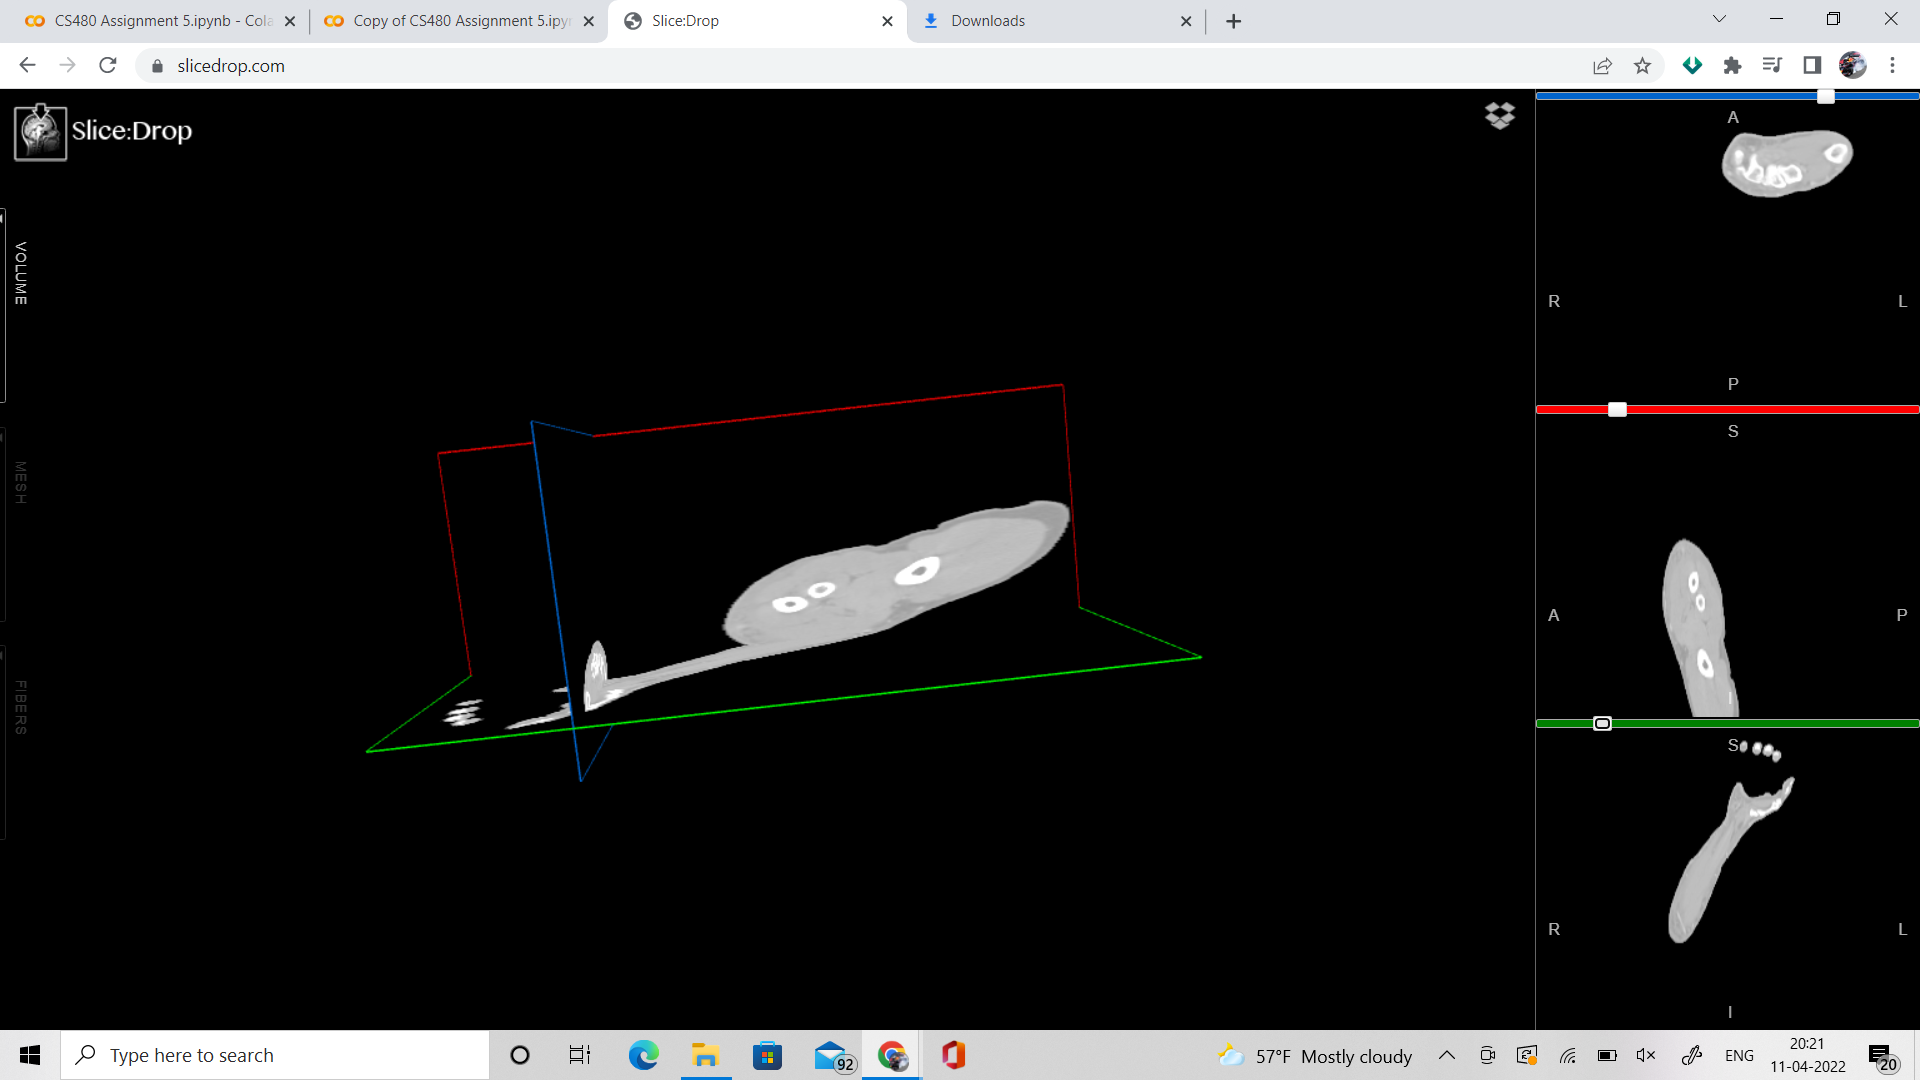

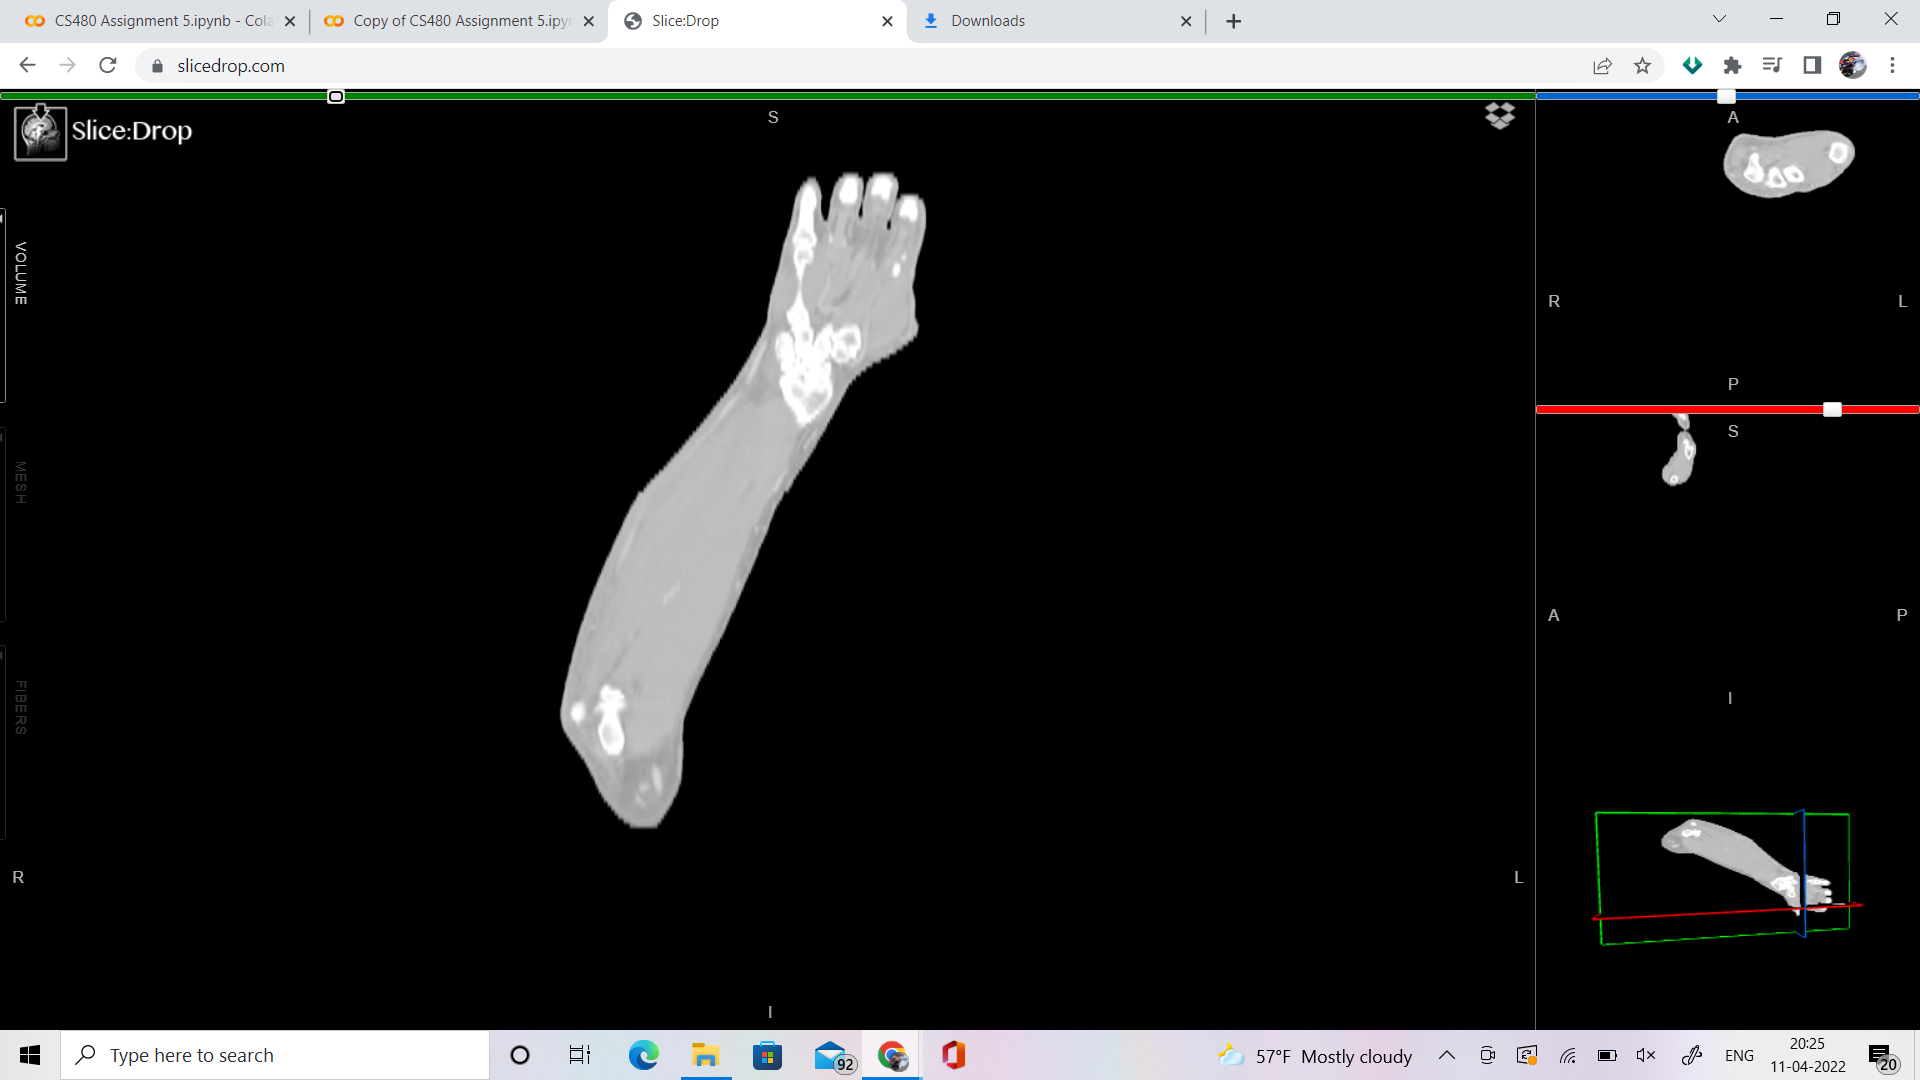

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [10]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [11]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [18]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.
import os
import numpy as np
os.chdir("./ct")
root_dir_loc = "."
fileNames = os.listdir(root_dir_loc)
for filename in fileNames:
  if(".dcm" not in filename):
    fileNames.remove(filename)

fileNames.sort()

In [20]:
from pydicom import dcmread

In [34]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import matplotlib.pyplot as plt
data = dcmread(fileNames[0])
print("No of files loaded")
print(len(fileNames))
dimensions = data.pixel_array.shape
print("Dimension of images in dcm files")
print(dimensions)
th_darray = np.empty((dimensions[0], dimensions[1], len(fileNames)))
for i in range(len(fileNames)):
  data = dcmread(fileNames[i])
  th_darray[:,:, i] = data.pixel_array

No of files loaded
220
Dimension of images in dcm files
(454, 512)


In [23]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

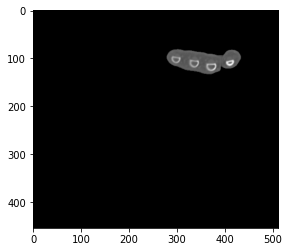

In [28]:
# TODO: YOUR CODE FOR AXIAL
plt.imshow(th_darray[:,:,30], cmap='gray')

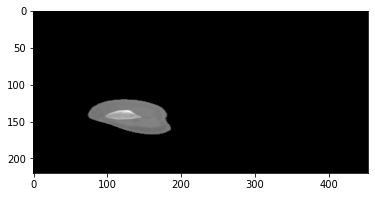

In [29]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(th_darray[:,45,:].T, cmap='gray')

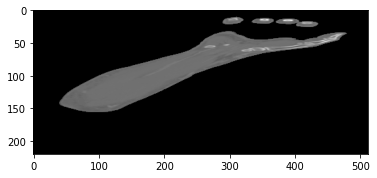

In [36]:
# TODO: YOUR CODE FOR CORONAL
plt.imshow(th_darray[78,:,:].T, cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [38]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [37]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [48]:
# TODO: YOUR CODE
first_file_data = dcmread(fileNames[0])
window = first_file_data.WindowWidth
level = first_file_data.WindowCenter
print("width of Window", first_file_data[0x0028, 0x1050])
print("level of window", first_file_data[0x0028, 0x1051])

width of Window (0028, 1050) Window Center                       DS: '30.0'
level of window (0028, 1051) Window Width                        DS: '410.0'


In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

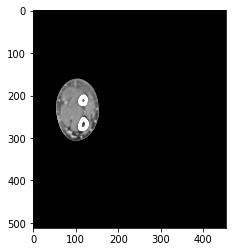

In [51]:
# TODO: YOUR CODE
vmin = level - window/2
vmax = level + window/2
plt.imshow(th_darray[:,:,80].T + data.RescaleIntercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

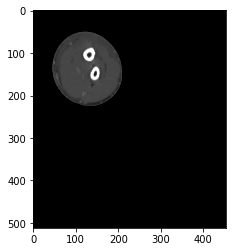

In [66]:
vmin = level - window/2
vmax = level + window/2
plt.imshow(th_darray[:,:,118].T + data.RescaleIntercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [67]:
# Which values make sense and why?

In [68]:
# TODO: YOUR ANSWER

When we increase the index value.Tissue were unable to capture clearly & Bones were able to capture clearly.
When we decrease the index value.Tissue were able to capture clearly & Bones were unable to capture clearly.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

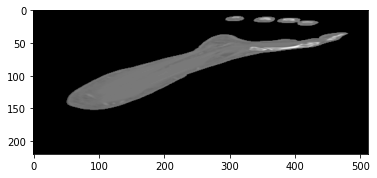

In [56]:
# TODO: YOUR CODE TO SEGMENT FAT
level = -120
window = 600
vmin = level - window
vmax = level + window
index = 70
image = th_darray.copy().astype(np.int16)
image[(image < vmin) & (image > vmax)] = 0
plt.imshow(image[index,:,:].T + data.RescaleIntercept, cmap='gray')
plt.show()

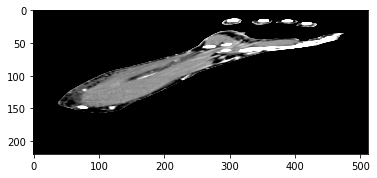

In [57]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
level = 43
window = 183
vmin = level - window/2
vmax = level + window/2
index = 82
image = th_darray.copy().astype(np.int16)
image[(image > vmin) & (image < vmax)] = 0
plt.imshow(image[index,:,:].T + data.RescaleIntercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

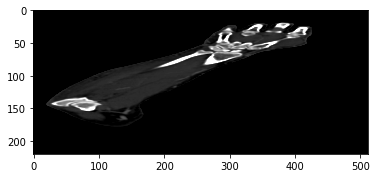

In [58]:
# TODO: YOUR CODE TO SEGMENT BONES
level = 333
window = 1234
vmin = level - window/3
vmax = level + window/3
index = 109
image = th_darray.copy().astype(np.int16)
image[(image < vmin) & (image > vmax)] = 0
plt.imshow(image[index,:,:].T + data.RescaleIntercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [60]:
# Are the segmentations good?

In [61]:
# TODO: YOUR ANSWER

Yes, The Segmentations are Good

In [59]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""